# Exploracion de datos.

In [87]:
import pandas as pd


In [88]:
df = pd.read_csv("/Users/familiavs/Documents/GitHub/python-ml-course/datasets/Covid/25totalcases.csv")

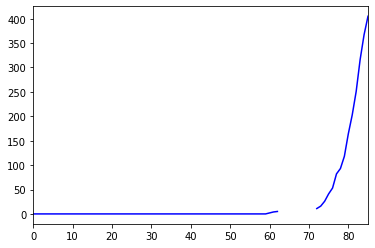

In [70]:
df['Mexico'].plot(kind='line',color='blue')
#Podemos observar que la informacion no esta completa por lo que debemos de rellenar los datos faltantes.

In [96]:
#Rellenamos los valores faltantes
pd.set_option('max_rows',99999)
df = df.fillna(method='ffill')
df['Mexico']


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      2.0
61      4.0
62      5.0
63      5.0
64      5.0
65      5.0
66      5.0
67      5.0
68      5.0
69      7.0
70      7.0
71      7.0
72     11.0
73     16.0
74     26.0
75     41.0
76     53.0
77     82.0
78     93.0
79    118.0
80    164.0
81    203.0
82    251.0
83  

# Transponemos el DataSet

In [103]:
df2 = df.T
df2.tail()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,33,33,33,33,36,36,36,84,91
Vietnam,0,0,0,0,0,0,0,0,0,0,...,57,61,61,76,85,87,94,118,123,134
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,2,2,2,3,3,3
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


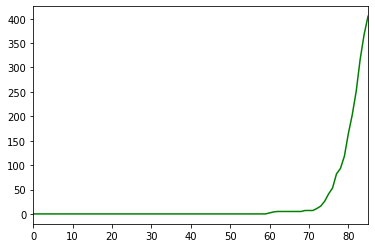

In [104]:
#Podemos observar que los valores faltantes se an rellenado.
df['Mexico'].plot(kind='line',color='green')

In [105]:
#Eliminamos la fila date 
df2 = df2.drop(['date'])
#Reseteamos el index.
df2 = df2.reset_index()
#Renombramos
df2 = df2.rename({'index':'Paises',85:'Total'},axis=1)
#Comprobamos que los datos se hayan corregido
df2.head()

,Paises,0,1,2,3,4,5,6,7,8,...,76,77,78,79,80,81,82,83,84,Total
0,World,27,27,27,44,44,59,59,59,59,...,167414,180159,194909,213254,242473,271228,305275,338303,378040,416916
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,34,40,42
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42,51,55,59,70,70,76,89,100,123
3,Algeria,0,0,0,0,0,0,0,0,0,...,48,60,60,73,82,94,94,102,189,231
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,14,14,53,75,75,88,113,133,164


# Creamos Grafica

In [128]:
import plotly.express as px
fig = px.line(df2,x='Paises', y='Total')
fig.show()

In [129]:
#Comparamos casos de paises que nos interesan
import plotly.graph_objects as go
from plotly.subplots import make_subplots
cols_plot = ['China', 'Spain', 'United States','Mexico','Argentina']
fig = make_subplots(rows=len(cols_plot), cols=1, start_cell="bottom-left")
i=1
j=0
for col in cols_plot:
    trace=go.Scatter(x=df[col], y=df['date'],mode='lines',name=cols_plot[j])
    fig.append_trace(trace,i,1)
    i=i+1
    j=j+1
fig.show()

# Para el caso de Mexico buscamos los paises que tengan entre 600 y 400 casos.

In [123]:
df3=df2[(df2['Total']>=400)&(df2['Total']<=600)]
df3=df3.T
df3=df3.reset_index()
names=df3.iloc[0]
df3=df3[1:]
df3.columns=names
df3=df3.drop(['Paises'],axis=1)
df3=df3.fillna(0)

In [125]:
df3.tail()

,India,Mexico,Panama,Peru,Philippines,Qatar,Russia,Singapore,Slovenia,South Africa
82,231.0,203.0,200.0,263.0,230.0,470.0,253.0,385,341.0,205.0
83,320.0,251.0,245.0,318.0,380.0,481.0,306.0,432,383.0,240.0
84,439.0,316.0,313.0,363.0,380.0,494.0,438.0,455,414.0,274.0
85,492.0,367.0,345.0,395.0,462.0,501.0,438.0,509,442.0,402.0
86,562.0,405.0,443.0,416.0,552.0,526.0,495.0,558,480.0,557.0


In [126]:
!pip install cufflinks --upgrade

     |████████████████████████████████| 81kB 164kB/s eta 0:00:01


  Stored in directory: /Users/familiavs/Library/Caches/pip/wheels/7d/ba/8d/38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks


In [127]:
import cufflinks as cf
import plotly.offline as py
py.iplot([{
   'x': df3.index,
   'y': df3[col],
   'name': col
}  for col in df3.columns], filename='cufflinks/multiple-lines-on-same-chart')